# Couple candlestick - Analytics

In [2]:
# Apply for Enguffing or dark cloud cover and piercing patterns

### Import Library

In [3]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [4]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [5]:
data = dataset.copy()

In [6]:
data = data[(data.index > '2020-11-01 00:00:00') & (data.index < '2024-10-01 00:00:00')]
# data = data[data.index > '2020-11-01 00:00:00']

In [7]:
def get_couple_candleticks_signal(r):
    signal = ''
    if r['Open'] >= r['Close_shift'] > r['Close'] and r['Close_shift'] > r['Open_shift'] and  r['Close'] < ( r['Close_shift'] +  r['Open_shift']) / 2:
        signal = 'short'
    elif r['Close'] > r['Close_shift'] >= r['Open'] and r['Close_shift'] < r['Open_shift'] and  r['Close'] > ( r['Close_shift'] +  r['Open_shift']) / 2:
        signal = 'long'
    return signal

In [8]:
# Couple candlesticks signal
data['Open_shift'] = data['Open'].shift(1)
data['Close_shift'] = data['Close'].shift(1)
data['max_5'] = data['High'].rolling(5).max()
data['min_5'] = data['Low'].rolling(5).min()
data['signal'] = data.apply(lambda r: get_couple_candleticks_signal(r), axis=1)

In [9]:
data[data['signal'] != '']

,Open,High,Low,Close,Volume,Open_shift,Close_shift,max_5,min_5,signal
Date,,,,,,,,,,
2020-11-02 09:50:00,898.1,899.4,898.1,898.6,1039,898.8,898.1,899.8,897.7,long
2020-11-02 10:15:00,899.6,901.5,899.6,901.2,2305,899.9,899.7,901.5,898.6,long
2020-11-02 10:45:00,899.4,900.2,896.7,897.9,3197,899.2,899.4,900.4,896.7,short
2020-11-02 11:05:00,896.9,898.1,896.4,897.6,2101,897.3,897.0,900.2,895.4,long
2020-11-02 11:15:00,896.3,898.3,895.5,898.0,2830,897.5,896.6,898.3,895.4,long
...,...,...,...,...,...,...,...,...,...,...
2024-09-30 13:00:00,1354.0,1354.5,1352.7,1353.0,2546,1353.5,1353.8,1354.5,1352.6,short
2024-09-30 13:10:00,1353.2,1353.3,1352.0,1352.9,2792,1353.0,1353.2,1354.5,1352.0,short
2024-09-30 13:15:00,1352.9,1353.8,1352.4,1353.8,2194,1353.2,1352.9,1354.5,1352.0,long


## Trap labeling

In [10]:
traps = []
for i, row in data.iterrows():
    if row['signal']:
        current_date = row.name.strftime('%Y-%m-%d ').format()
        current_time = row.name
        data_to_end_day = data[(data.index > current_time) & (data.index < current_date + ' 14:30:00')]
        if not len(data_to_end_day):
            traps.append(1)
            continue
        #
        if row['signal'] == 'short':
            if len(data_to_end_day[data_to_end_day.High > row['Close'] + 3.5]) > 0:
                traps.append(1)
            else:
                traps.append(0)
        else:
            if len(data_to_end_day[data_to_end_day.Low < row['Close'] - 3.5]) > 0:
                traps.append(1)
            else:
                traps.append(0)
    else:
        traps.append(0)

In [11]:
data['trap'] = traps

In [12]:
data[data.trap != 0]

,Open,High,Low,Close,Volume,Open_shift,Close_shift,max_5,min_5,signal,trap
Date,,,,,,,,,,,
2020-11-02 10:15:00,899.6,901.5,899.6,901.2,2305,899.9,899.7,901.5,898.6,long,1
2020-11-02 10:45:00,899.4,900.2,896.7,897.9,3197,899.2,899.4,900.4,896.7,short,1
2020-11-02 13:15:00,899.4,899.4,896.3,896.9,2723,899.2,899.3,900.4,896.3,short,1
2020-11-02 13:25:00,897.4,898.5,896.4,896.7,2420,896.9,897.4,900.4,896.3,short,1
2020-11-02 13:40:00,899.2,899.2,897.0,897.7,2626,898.3,899.1,899.5,896.4,short,1
...,...,...,...,...,...,...,...,...,...,...,...
2024-09-27 09:35:00,1359.6,1361.3,1359.3,1361.2,4147,1360.3,1359.6,1362.0,1358.4,long,1
2024-09-27 10:20:00,1354.9,1356.3,1354.9,1356.0,4647,1355.3,1354.9,1359.5,1353.7,long,1
2024-09-27 11:25:00,1357.7,1358.2,1357.6,1358.0,1369,1358.0,1357.7,1360.4,1357.2,long,1


## Analytics

In [13]:
data['RSI'] = ta.rsi(data["Close"], length=14)
data['RSI'] = round(data['RSI'])
data["ATR"] = ta.atr(data['High'], data['Low'], data['Close'], length=14)
adx42 = ta.adx(data['High'], data['Low'], data['Close'], length=42)
adx5 = ta.adx(data['High'], data['Low'], data['Close'], length=5)
data = data.assign(ADX42=adx42['ADX_42'])
data = data.assign(ADX5=adx5['ADX_5'])
macd = ta.macd(data['Close'], 26, 12, 9)
data = data.assign(MACDh=macd['MACDh_12_26_9']).rename(columns={'MACDh_12_26_9': 'MACDh'})    # Histogram

## Volume & body of couple candlesticks

In [40]:
df7 = data[["Open", "Close", "High", "Low", "signal", "Volume", "Close_shift", "Open_shift", "trap"]].copy()
df7['Volume_shift'] = df7['Volume'].shift(1)
df7['body'] = df7['Close'] - df7['Open']
df7['body_shift'] = df7['body'].shift(1)
df7['body_diff'] = df7['body'] / df7['body_shift']
df7['vol_diff'] = (df7['body'] * df7['Volume']) / (df7['body_shift'] * df7['Volume_shift'])
signal_data = df7[df7.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
long_trap_signals = trap_signals[trap_signals.signal == 'long']
short_trap_signals = trap_signals[trap_signals.signal == 'short']
real_signals = signal_data[signal_data.trap == 0]
long_real_signals = real_signals[real_signals.signal == 'long']
short_real_signals = real_signals[real_signals.signal == 'short']

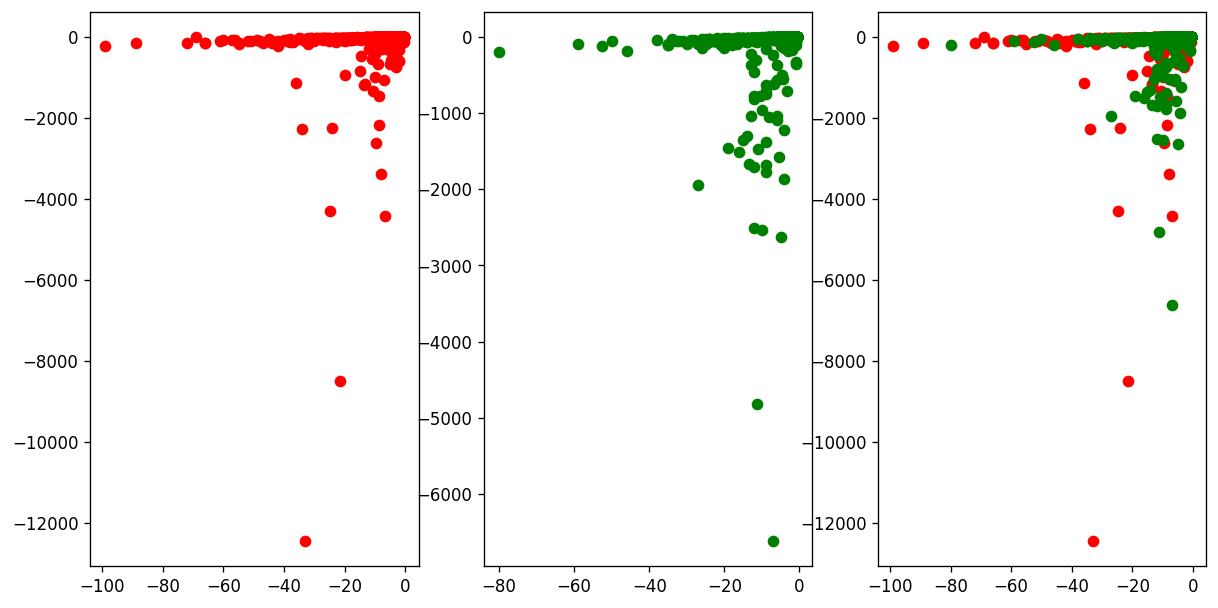

In [41]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['body_diff'], trap_signals['vol_diff'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['body_diff'], real_signals['vol_diff'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['body_diff'], trap_signals['vol_diff'], c='red')
plt.scatter(real_signals['body_diff'], real_signals['vol_diff'], c='green')

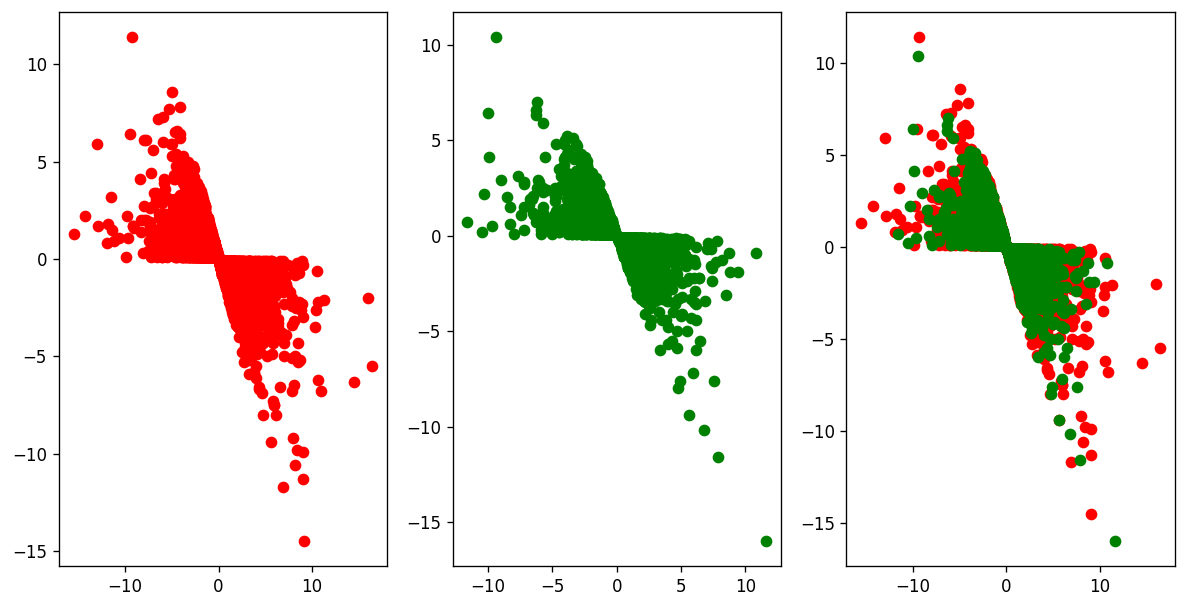

In [42]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['body'], trap_signals['body_shift'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['body'], real_signals['body_shift'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['body'], trap_signals['body_shift'], c='red')
plt.scatter(real_signals['body'], real_signals['body_shift'], c='green')

## Trend strength & MACD momentum & trap relationship

In [14]:
df6 = data[["Open", "Close", "High", "Low", "signal", "MACDh", "ADX42", "trap"]].copy()
signal_data = df6[df6.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
long_trap_signals = trap_signals[trap_signals.signal == 'long']
short_trap_signals = trap_signals[trap_signals.signal == 'short']
real_signals = signal_data[signal_data.trap == 0]
long_real_signals = real_signals[real_signals.signal == 'long']
short_real_signals = real_signals[real_signals.signal == 'short']

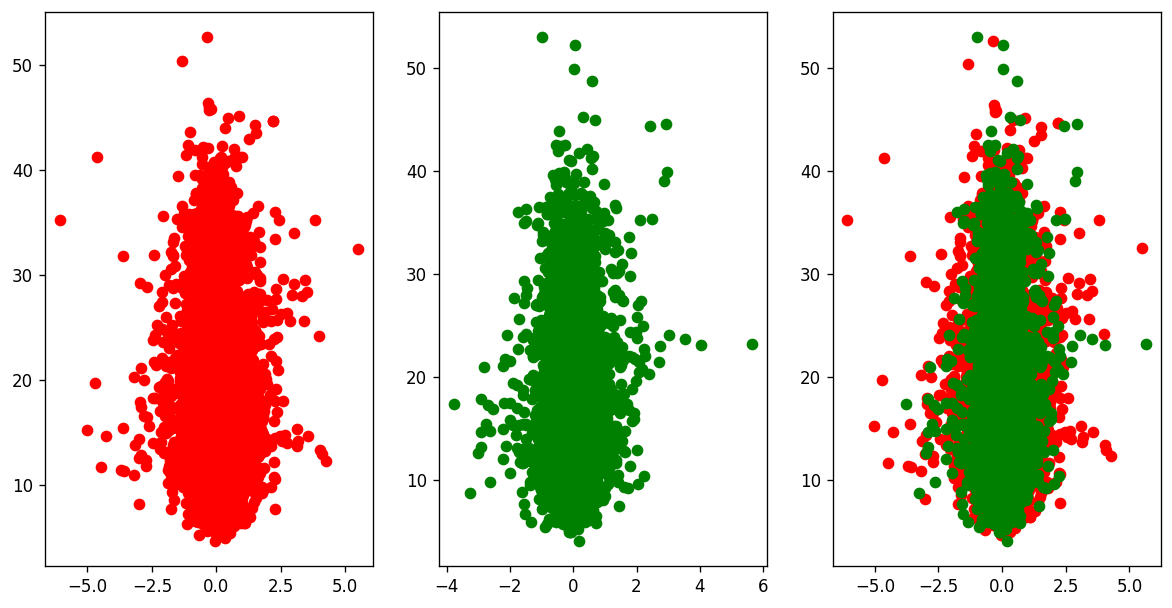

In [15]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['MACDh'], trap_signals['ADX42'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['MACDh'], real_signals['ADX42'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['MACDh'], trap_signals['ADX42'], c='red')
plt.scatter(real_signals['MACDh'], real_signals['ADX42'], c='green')

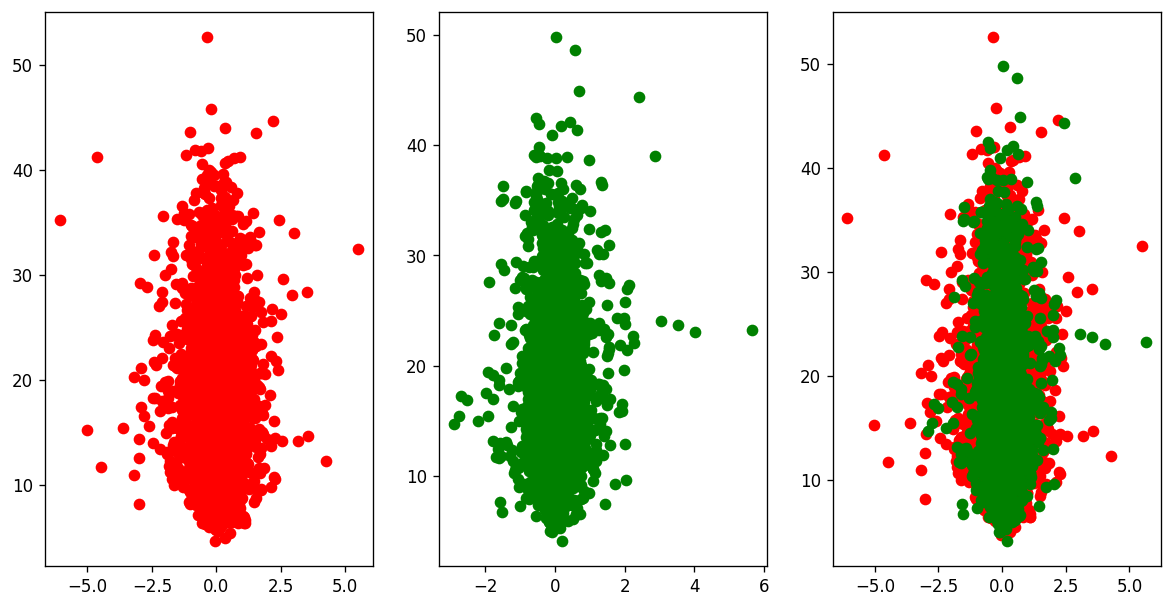

In [16]:
plt.subplot(1, 3, 1)
plt.scatter(long_trap_signals['MACDh'], long_trap_signals['ADX42'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(long_real_signals['MACDh'], long_real_signals['ADX42'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(long_trap_signals['MACDh'], long_trap_signals['ADX42'], c='red')
plt.scatter(long_real_signals['MACDh'], long_real_signals['ADX42'], c='green')

## Trend strength ADX & trap relation ship

In [17]:
df5 = data[["Open", "Close", "High", "Low", "signal", "ADX5", "ADX42", "trap"]].copy()
signal_data = df5[df5.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
long_trap_signals = trap_signals[trap_signals.signal == 'long']
short_trap_signals = trap_signals[trap_signals.signal == 'short']
real_signals = signal_data[signal_data.trap == 0]
long_real_signals = real_signals[real_signals.signal == 'long']
short_real_signals = real_signals[real_signals.signal == 'short']

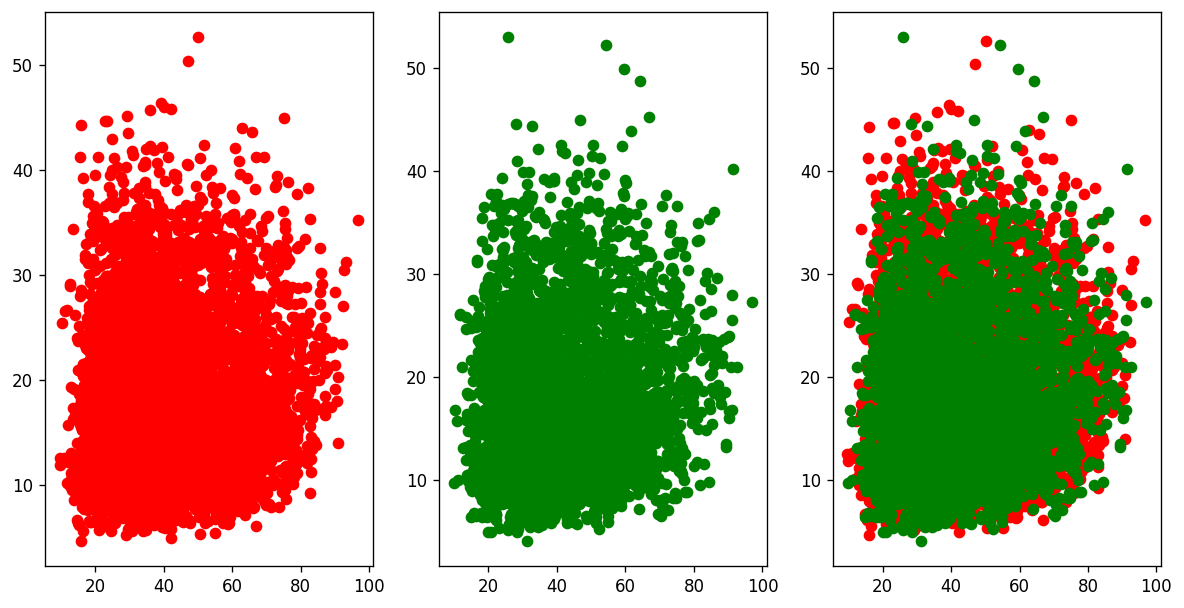

In [18]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['ADX5'], trap_signals['ADX42'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['ADX5'], real_signals['ADX42'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['ADX5'], trap_signals['ADX42'], c='red')
plt.scatter(real_signals['ADX5'], real_signals['ADX42'], c='green')

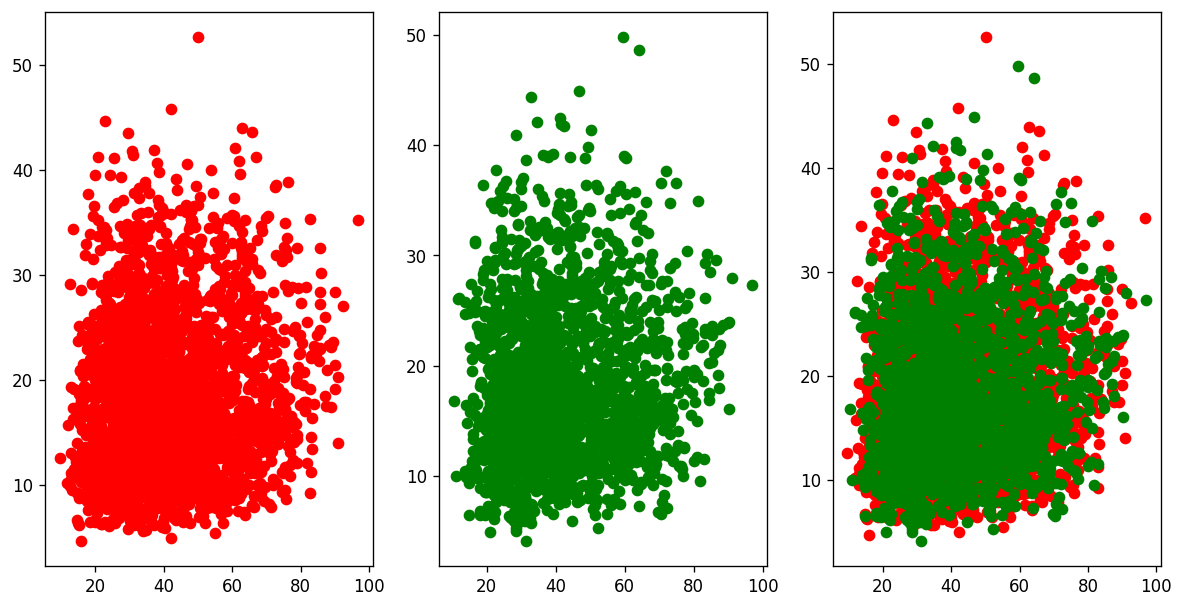

In [19]:
plt.subplot(1, 3, 1)
plt.scatter(long_trap_signals['ADX5'], long_trap_signals['ADX42'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(long_real_signals['ADX5'], long_real_signals['ADX42'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(long_trap_signals['ADX5'], long_trap_signals['ADX42'], c='red')
plt.scatter(long_real_signals['ADX5'], long_real_signals['ADX42'], c='green')

## Price move & ATR & trap relationship

In [20]:
df4 = data[["Open", "Close", "High", "Low", "signal", "ATR", "trap"]].copy()
df4['price_move'] = df4['Close'] - df4['Close'].shift(1)
signal_data = df4[df4.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
long_trap_signals = trap_signals[trap_signals.signal == 'long']
short_trap_signals = trap_signals[trap_signals.signal == 'short']
real_signals = signal_data[signal_data.trap == 0]
long_real_signals = real_signals[real_signals.signal == 'long']
short_real_signals = real_signals[real_signals.signal == 'short']

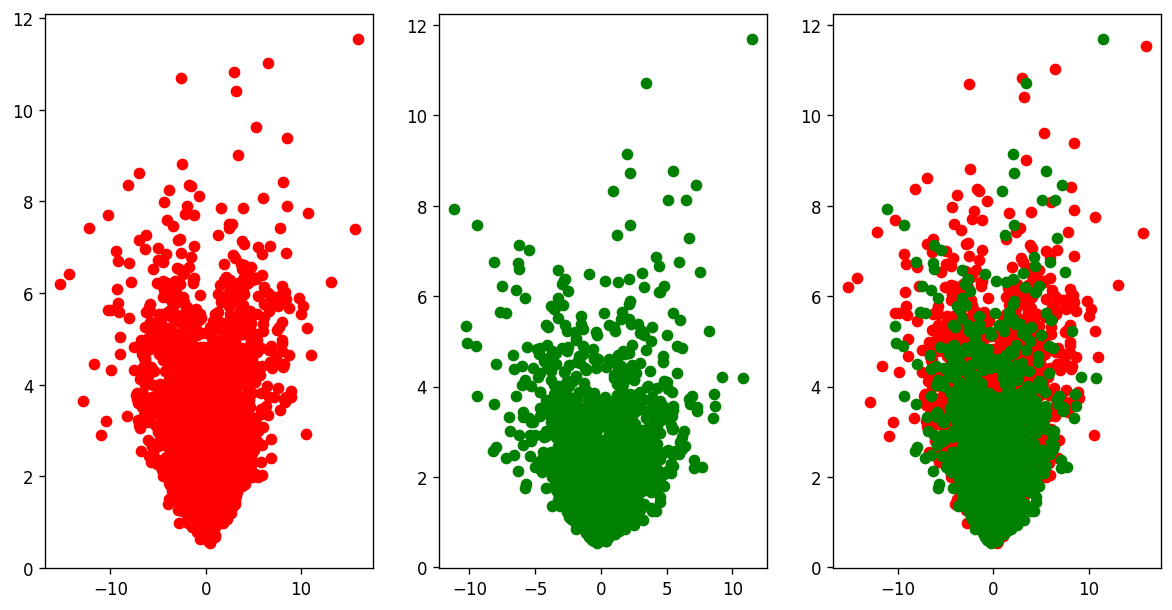

In [21]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['price_move'], trap_signals['ATR'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['price_move'], real_signals['ATR'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['price_move'], trap_signals['ATR'], c='red')
plt.scatter(real_signals['price_move'], real_signals['ATR'], c='green')

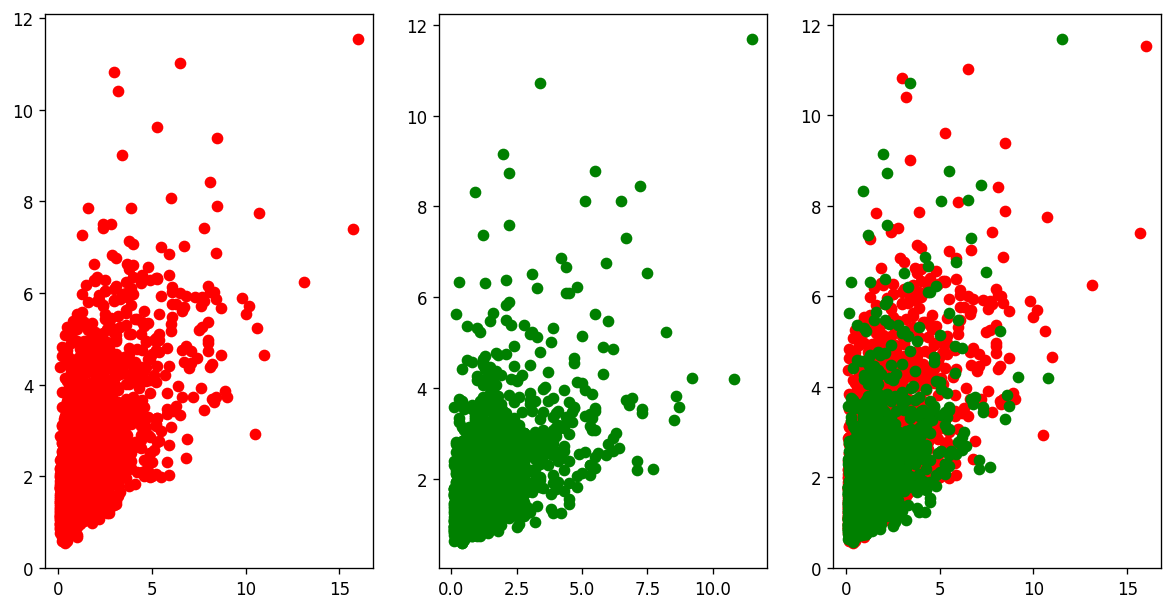

In [22]:
plt.subplot(1, 3, 1)
plt.scatter(long_trap_signals['price_move'], long_trap_signals['ATR'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(long_real_signals['price_move'], long_real_signals['ATR'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(long_trap_signals['price_move'], long_trap_signals['ATR'], c='red')
plt.scatter(long_real_signals['price_move'], long_real_signals['ATR'], c='green')

## Min-Max last 20 & current price & trap relation ship

In [23]:
df1 = data[["Open", "Close", "High", "Low", "signal", "RSI", "trap"]].copy()
df1['max_close20'] = df1['Close'].rolling(20).max()
df1['min_close20'] = df1['Close'].rolling(20).min()
df1['diff_to_max'] = df1['Close'] / df1['max_close20']
df1['diff_to_max'] = round(df1['diff_to_max'], 3)
df1['diff_to_min'] = df1['Close'] / df1['min_close20']
df1['diff_to_min'] = round(df1['diff_to_min'], 3)
signal_data = df1[df1.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
long_trap_signals = trap_signals[trap_signals.signal == 'long']
short_trap_signals = trap_signals[trap_signals.signal == 'short']
real_signals = signal_data[signal_data.trap == 0]
long_real_signals = real_signals[real_signals.signal == 'long']
short_real_signals = real_signals[real_signals.signal == 'short']

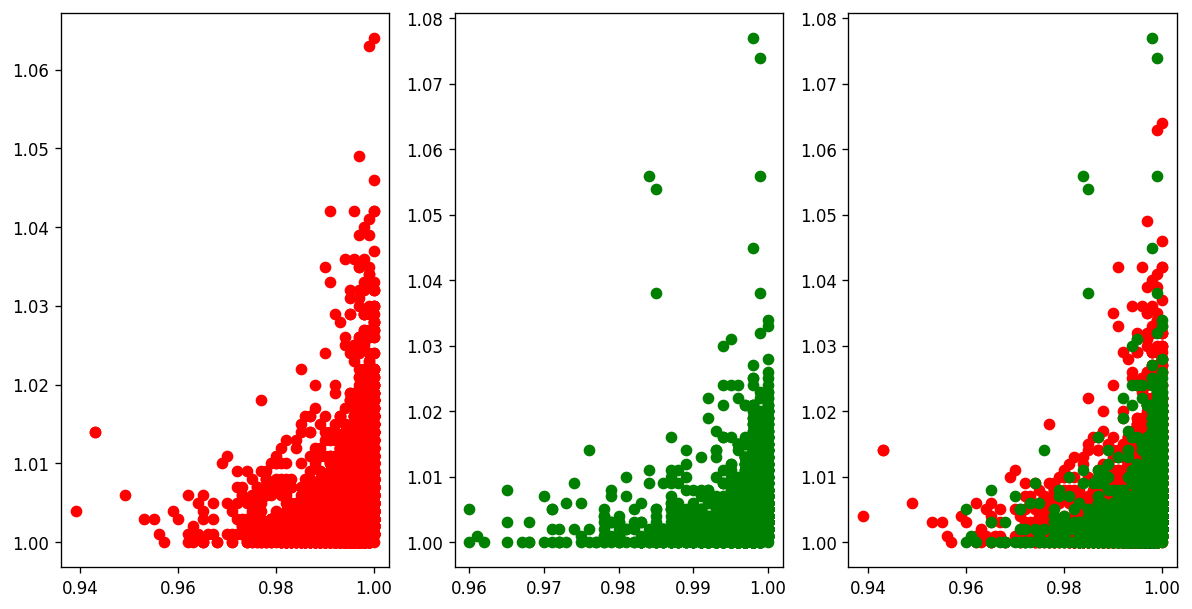

In [24]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['diff_to_max'], trap_signals['diff_to_min'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['diff_to_max'], real_signals['diff_to_min'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['diff_to_max'], trap_signals['diff_to_min'], c='red')
plt.scatter(real_signals['diff_to_max'], real_signals['diff_to_min'], c='green')

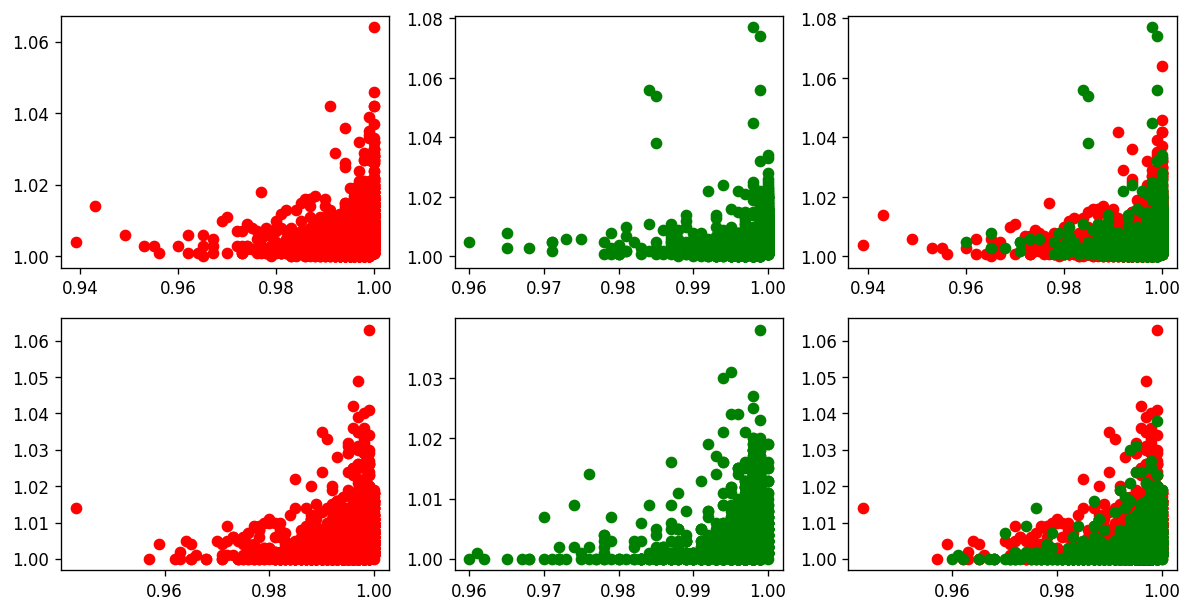

In [25]:
plt.subplot(2, 3, 1)
plt.scatter(long_trap_signals['diff_to_max'], long_trap_signals['diff_to_min'], c='red')
plt.subplot(2, 3, 2)
plt.scatter(long_real_signals['diff_to_max'], long_real_signals['diff_to_min'], c='green')
plt.subplot(2, 3, 3)
plt.scatter(long_trap_signals['diff_to_max'], long_trap_signals['diff_to_min'], c='red')
plt.scatter(long_real_signals['diff_to_max'], long_real_signals['diff_to_min'], c='green')
plt.subplot(2, 3, 4)
plt.scatter(short_trap_signals['diff_to_max'], short_trap_signals['diff_to_min'], c='red')
plt.subplot(2, 3, 5)
plt.scatter(short_real_signals['diff_to_max'], short_real_signals['diff_to_min'], c='green')
plt.subplot(2, 3, 6)
plt.scatter(short_trap_signals['diff_to_max'], short_trap_signals['diff_to_min'], c='red')
plt.scatter(short_real_signals['diff_to_max'], short_real_signals['diff_to_min'], c='green')

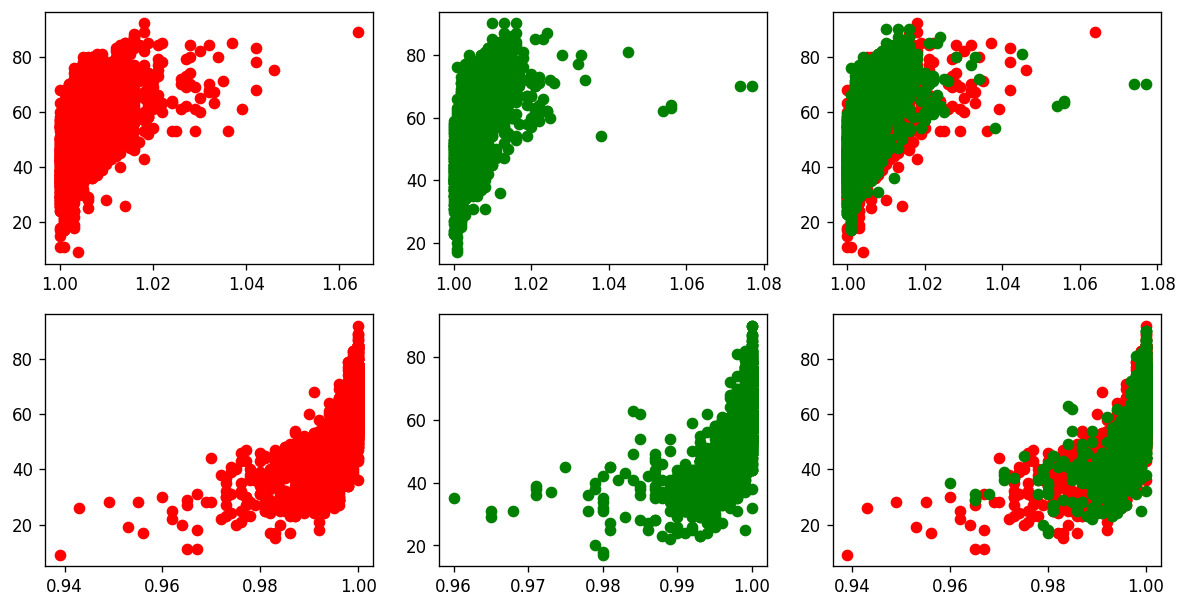

In [26]:
plt.subplot(2, 3, 1)
plt.scatter(long_trap_signals['diff_to_min'], long_trap_signals['RSI'], c='red')
plt.subplot(2, 3, 2)
plt.scatter(long_real_signals['diff_to_min'], long_real_signals['RSI'], c='green')
plt.subplot(2, 3, 3)
plt.scatter(long_trap_signals['diff_to_min'], long_trap_signals['RSI'], c='red')
plt.scatter(long_real_signals['diff_to_min'], long_real_signals['RSI'], c='green')
plt.subplot(2, 3, 4)
plt.scatter(long_trap_signals['diff_to_max'], long_trap_signals['RSI'], c='red')
plt.subplot(2, 3, 5)
plt.scatter(long_real_signals['diff_to_max'], long_real_signals['RSI'], c='green')
plt.subplot(2, 3, 6)
plt.scatter(long_trap_signals['diff_to_max'], long_trap_signals['RSI'], c='red')
plt.scatter(long_real_signals['diff_to_max'], long_real_signals['RSI'], c='green')

## Divergence RSI & trap relationship visualize

In [27]:
df2 = data[["Open", "Close", "High", "Low", "signal", "RSI", "trap"]].copy()
# Identify Lower Low (LL) and Higher RSI
df2['LL'] = df2['Low'] < df2['Low'].shift(1).rolling(20).min() - 0.1
df2['Higher_RSI'] = df2['RSI'] > df2['RSI'].shift(1).rolling(20).min()
# Find divergence signals
df2['bullish_signal'] = df2.apply(lambda r: 1 if r['LL'] & r['Higher_RSI'] else 0, axis=1)
# Identify Higher High (HH) and Lower RSI
df2['HH'] = df2['High'] > df2['High'].shift(1).rolling(20).max() + 0.1
df2['Lower_RSI'] = df2['RSI'] < df2['RSI'].shift(1).rolling(20).max()
# Find divergence signals
df2['bearish_signal'] = df2.apply(lambda r: 1 if r['HH'] & r['Lower_RSI'] else 0, axis=1)
# Bullish Fair Value Gap: Previous High < Next Low (Upward imbalance)
df2["Bullish_FVG"] = df2["High"].shift(2) < df2["Low"]
df2['Bullish_FVG'] = df2.apply(lambda r: 1 if r['Bullish_FVG'] else 0, axis=1)
# Bearish Fair Value Gap: Previous Low > Next High (Downward imbalance)
df2["Bearish_FVG"] = df2["Low"].shift(2) > df2["High"]
df2['Bullish_FVG'] = df2.apply(lambda r: 1 if r['Bearish_FVG'] else 0, axis=1)
df2.dropna(inplace=True)
df2['pass_bearish_signal'] = df2['bearish_signal'].rolling(10).sum()
df2['pass_bullish_signal'] = df2['bullish_signal'].rolling(10).sum()
df2['pass_bearish_fvg'] = df2['Bearish_FVG'].rolling(10).sum()
df2['pass_bullish_fvg'] = df2['Bullish_FVG'].rolling(10).sum()
signal_data = df2[df2.signal != '']
long_signals = signal_data[signal_data.Close > signal_data.Open]
long_trap_signals = long_signals[long_signals.trap == 1]
long_real_signals = long_signals[long_signals.trap == 0]

<Axes: xlabel='RSI'>

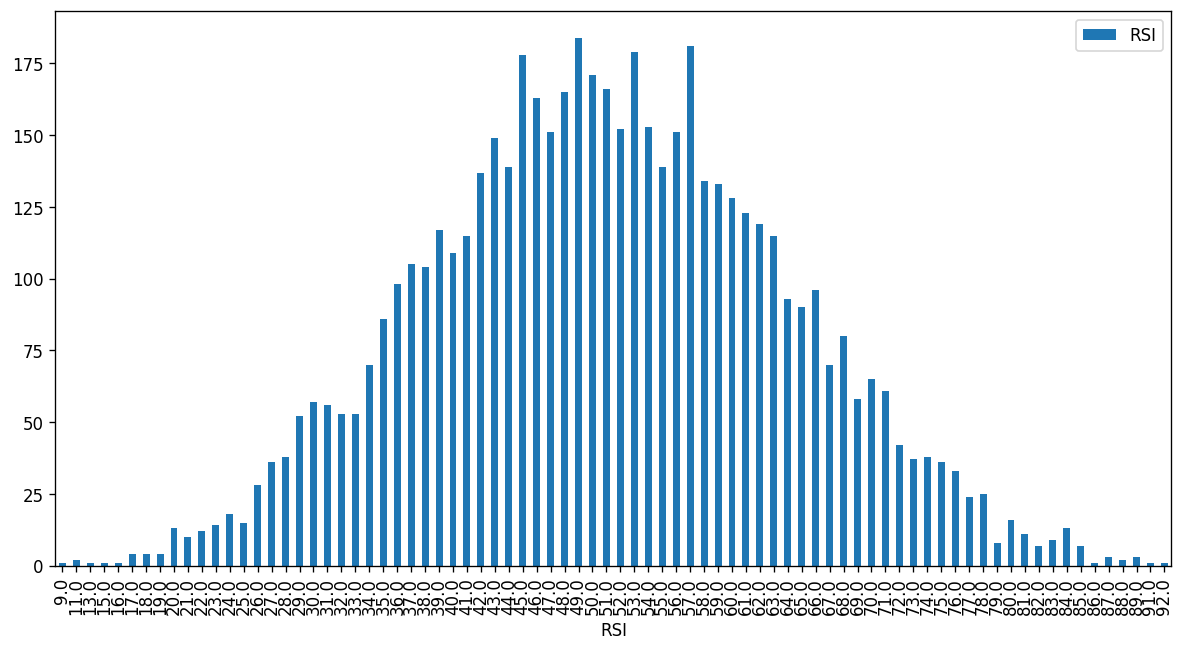

In [28]:
trap_data_grouped_by_rsi = signal_data[signal_data.trap == 1].groupby(['RSI'])[['RSI']].count()
trap_data_grouped_by_rsi.plot.bar()

<Axes: xlabel='RSI'>

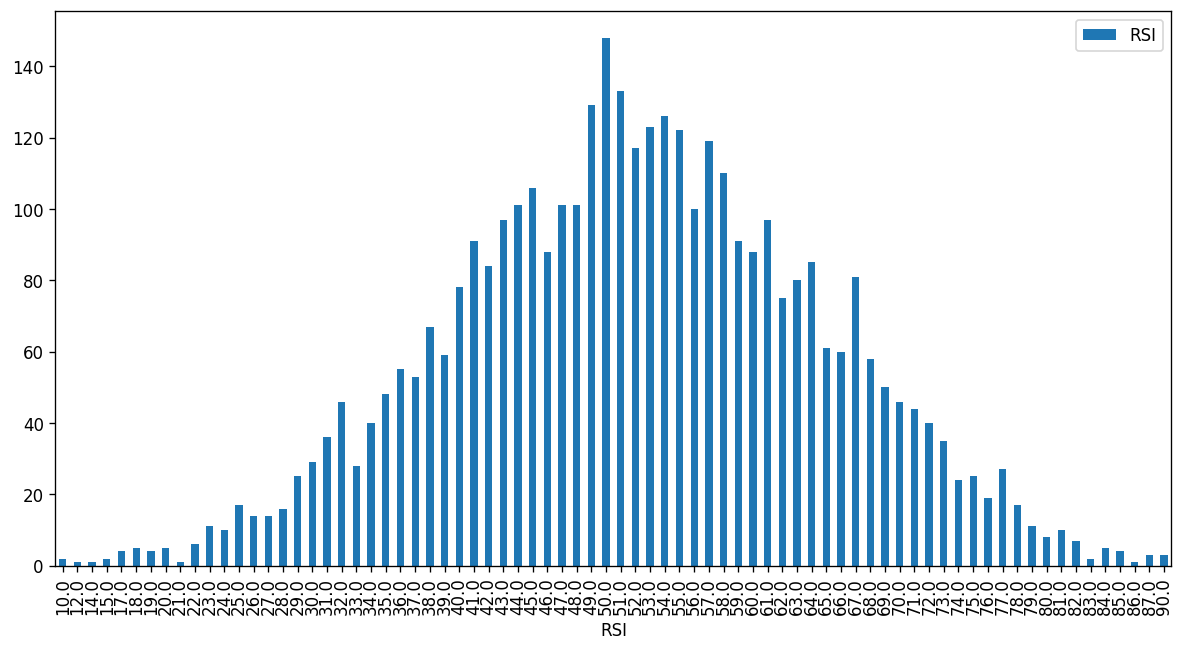

In [29]:
real_data_grouped_by_rsi = signal_data[signal_data.trap == 0].groupby(['RSI'])[['RSI']].count()
real_data_grouped_by_rsi.plot.bar()

<Axes: xlabel='RSI'>

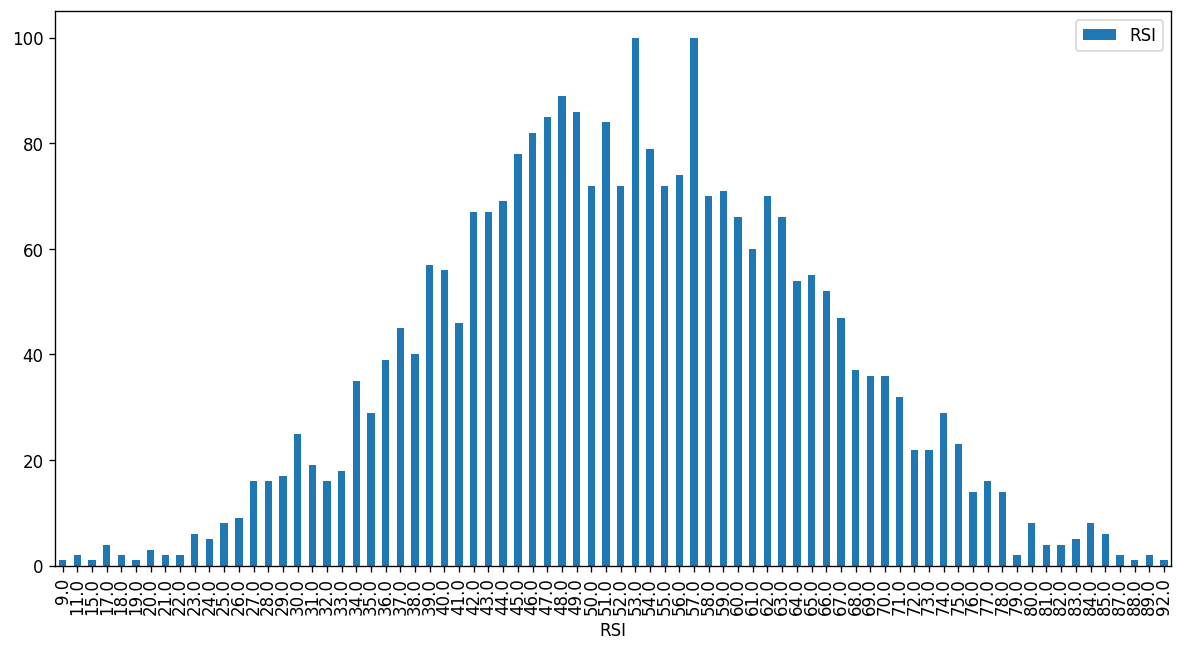

In [30]:
ltrap_data_grouped_by_rsi = long_trap_signals.groupby(['RSI'])[['RSI']].count()
ltrap_data_grouped_by_rsi.plot.bar()

In [31]:
# Long Trap
long_trap_signals[(long_trap_signals.pass_bullish_signal > 0) | (long_trap_signals.pass_bullish_fvg > 0)]

,Open,Close,High,Low,signal,RSI,trap,LL,Higher_RSI,bullish_signal,HH,Lower_RSI,bearish_signal,Bullish_FVG,Bearish_FVG,pass_bearish_signal,pass_bullish_signal,pass_bearish_fvg,pass_bullish_fvg
Date,,,,,,,,,,,,,,,,,,,
2020-11-02 13:45:00,897.7,900.4,900.4,897.2,long,58.0,1,False,True,0,False,False,0,0,False,0.0,0.0,1.0,1.0
2020-11-03 13:25:00,906.3,907.4,907.4,905.7,long,49.0,1,False,True,0,False,True,0,0,False,0.0,1.0,2.0,2.0
2020-11-05 13:40:00,916.0,916.8,917.3,915.9,long,50.0,1,False,True,0,False,True,0,0,False,1.0,1.0,1.0,1.0
2020-11-05 14:10:00,913.9,915.4,915.4,913.3,long,46.0,1,False,True,0,False,True,0,0,False,0.0,1.0,0.0,0.0
2020-11-06 09:20:00,911.4,911.5,911.6,911.0,long,39.0,1,False,True,0,False,True,0,0,False,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-25 13:25:00,1347.0,1347.2,1347.8,1347.0,long,67.0,1,False,True,0,False,True,0,0,False,1.0,0.0,2.0,2.0
2024-09-27 09:10:00,1357.8,1358.4,1358.7,1357.7,long,50.0,1,False,True,0,False,True,0,0,False,0.0,0.0,2.0,2.0
2024-09-27 09:35:00,1359.6,1361.2,1361.3,1359.3,long,57.0,1,False,True,0,False,True,0,0,False,0.0,0.0,1.0,1.0


In [32]:
# Real Long Signal
long_real_signals[(long_real_signals.pass_bullish_signal > 0) | (long_real_signals.pass_bullish_fvg == 0)]

,Open,Close,High,Low,signal,RSI,trap,LL,Higher_RSI,bullish_signal,HH,Lower_RSI,bearish_signal,Bullish_FVG,Bearish_FVG,pass_bearish_signal,pass_bullish_signal,pass_bearish_fvg,pass_bullish_fvg
Date,,,,,,,,,,,,,,,,,,,
2020-11-02 11:05:00,896.9,897.6,898.1,896.4,long,41.0,0,False,False,0,False,False,0,0,False,0.0,0.0,0.0,0.0
2020-11-02 11:15:00,896.3,898.0,898.3,895.5,long,46.0,0,False,False,0,False,False,0,0,False,0.0,0.0,0.0,0.0
2020-11-02 11:25:00,897.8,898.4,898.4,897.1,long,48.0,0,False,False,0,False,False,0,0,False,0.0,0.0,0.0,0.0
2020-11-02 13:00:00,898.0,898.5,899.3,898.0,long,49.0,0,False,False,0,False,False,0,0,False,0.0,0.0,0.0,0.0
2020-11-04 09:25:00,908.1,908.4,908.5,907.7,long,53.0,0,False,True,0,False,True,0,0,False,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-25 14:15:00,1342.5,1343.9,1344.7,1341.5,long,49.0,0,True,True,1,False,True,0,0,False,0.0,1.0,1.0,1.0
2024-09-26 09:25:00,1346.5,1347.3,1347.4,1346.4,long,60.0,0,False,True,0,False,True,0,0,False,0.0,0.0,0.0,0.0
2024-09-26 10:05:00,1351.5,1352.3,1352.6,1351.5,long,70.0,0,False,True,0,False,True,0,0,False,1.0,0.0,0.0,0.0


## Time & Trap relationship visualize

In [33]:
df3 = data[["Open", "Close", "High", "Low", "signal", "RSI", "trap"]].copy()
signal_data = df2[df2.signal != '']
long_signals = signal_data[signal_data.signal == 'long']
long_trap_signals = long_signals[long_signals.trap == 1]
long_real_signals = long_signals[long_signals.trap == 0]

<Axes: xlabel='hour'>

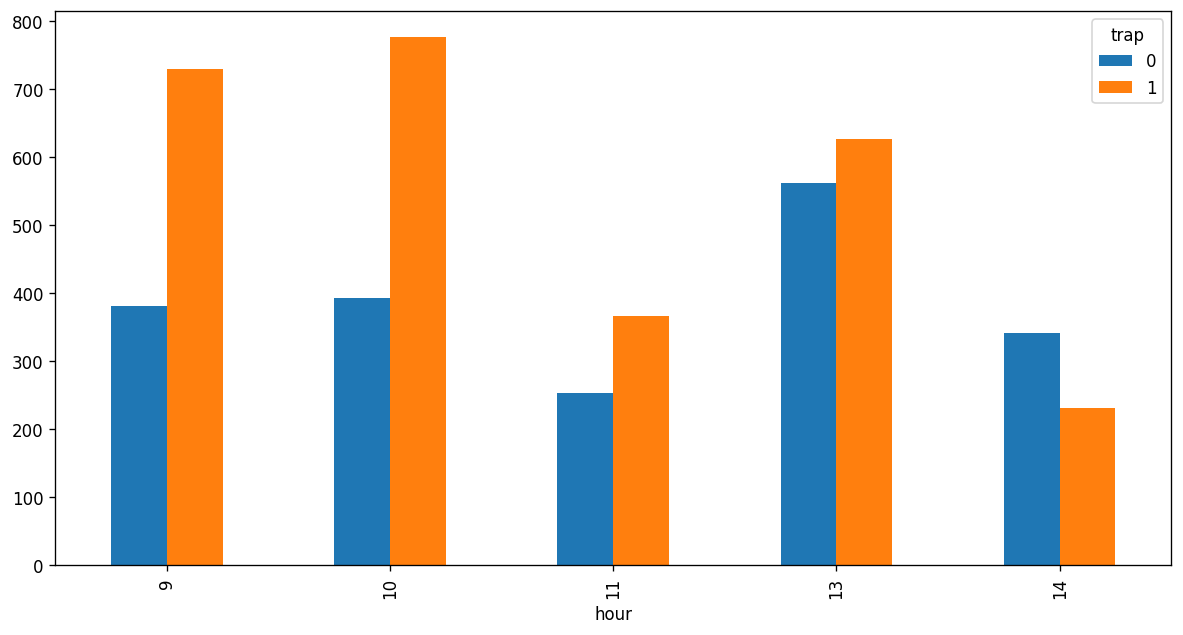

In [34]:
long_signals['hour'] = long_signals.index.hour
group_by_hour = long_signals.groupby(['hour', 'trap'])['hour'].count().rename({'hour': 'count'})
group_by_hour.unstack().plot.bar()

<Axes: xlabel='minute'>

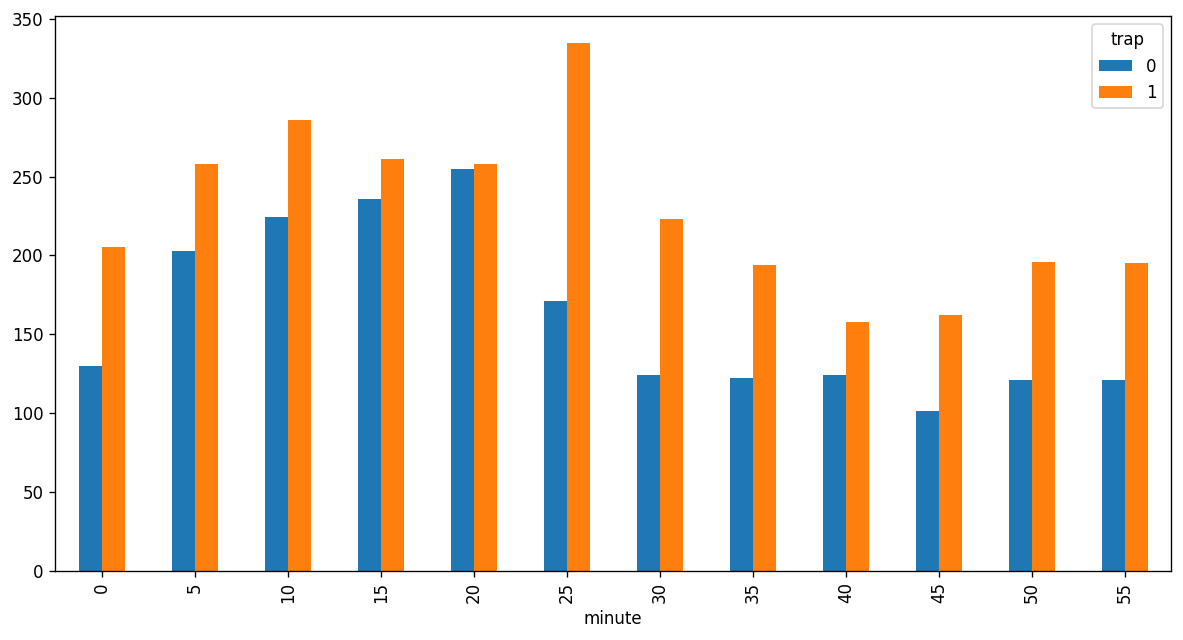

In [43]:
long_signals['minute'] = long_signals.index.minute
group_by_minute = long_signals.groupby(['minute', 'trap'])['minute'].count().rename({'minute': 'count'})
group_by_minute.unstack().plot.bar()